# Artificial Bee Colony

let $\mathbb{X}^{t} = \left\lbrace \mathbf{x}_1^{t},\ldots,\mathbf{x}_n^{t} \right\rbrace$ the population at time $t$, $f: \mathbb{X} \rightarrow \mathbb{R}$ the objective function, $g_i(x) \leq 0$ for $i=1,2,\ldots,m_1$ the soft restrictions and $h_i(x) = 0$ for $i=1,2,\ldots,m_2$ the hard restrictions of an optimization problem. Initialize the velocity for each particle as $\mathbf{v}_{i,j}^{0} = U\left[ - \left|\sup \mathbf{x}_{(\cdot,j)} - \inf \mathbf{x}_{(\cdot,j)}\right|, \left| \sup \mathbf{x}_{(\cdot,j)} - \inf \mathbf{x}_{(\cdot,j)} \right| \right]$. Set $\omega, c_1, c_2 \in [0, 1]$.

In [1]:
from IPython.display import display_markdown
from pyIpnHeuristic.benchmark import get_pg06

problem_parameters = get_pg06()

objective_function = problem_parameters.get("objective_function")
g = problem_parameters.get("gx")
h = problem_parameters.get("hx")
ranges = problem_parameters.get("ranges")
markdown = problem_parameters.get("markdown")
x_best = problem_parameters.get("x")
fx_best = problem_parameters.get("fx")

display_markdown(markdown, raw=True)
display_markdown("$\mathbf{{x}}_{{best}}$: {}, $f(\mathbf{{x}}_{{best}})$: {}, ranges: {}".format(x_best, fx_best, ranges), raw=True)

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

$\mathbf{x}_{best}$: [14.095, 0.8429607892154796], $f(\mathbf{x}_{best})$: -6961.813875580138, ranges: [[13, 100], [0, 100]]

## Initialize Artificial Bee Colony (ABC)

In [2]:
from pyIpnHeuristic.artificialBeeColony import ArtificialBeeColony

population_size = 5

artificialBeeColony = ArtificialBeeColony(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=population_size,
    smooth=False,
    mr=0.3,
    max_trials=3,
    epsilon=10 ** -4,
)

artificialBeeColony.search(iterations=100000, save_history=True)

## Results

In [3]:
import pandas as pd
import numpy as np

pd.DataFrame(
    sorted([{**hist, 
             "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
             "fxi - Fx": hist["fx"] - fx_best} 
            for hist in artificialBeeColony.history], key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,trials,iteration,||xi-X||,fxi - Fx
0,"[14.989659187577708, 4.54534194783053]",-3567.064255,0.000000,0,2,100000,3.808942,3394.749621
1,"[14.989659187577708, 4.54534194783053]",-3567.064255,0.000000,0,0,99999,3.808942,3394.749621
2,"[14.989659187577708, 4.54534194783053]",-3567.064255,0.000000,0,2,99998,3.808942,3394.749621
3,"[14.989659187577708, 4.54534194783053]",-3567.064255,0.000000,0,0,99997,3.808942,3394.749621
4,"[14.989659187577708, 4.54534194783053]",-3567.064255,0.000000,0,2,99996,3.808942,3394.749621
...,...,...,...,...,...,...,...,...
99995,"[20.4740915009489, 5.70921211358393]",-1769.482394,127.192307,0,1,5,8.023292,5192.331482
99996,"[20.4740915009489, 3.0438422037334822]",-3726.009863,130.515878,0,2,4,6.748088,3235.804012
99997,"[20.4740915009489, 3.0438422037334822]",-3726.009863,130.515878,0,0,3,6.748088,3235.804012
99998,"[20.4740915009489, 3.0438422037334822]",-3726.009863,130.515878,0,2,2,6.748088,3235.804012


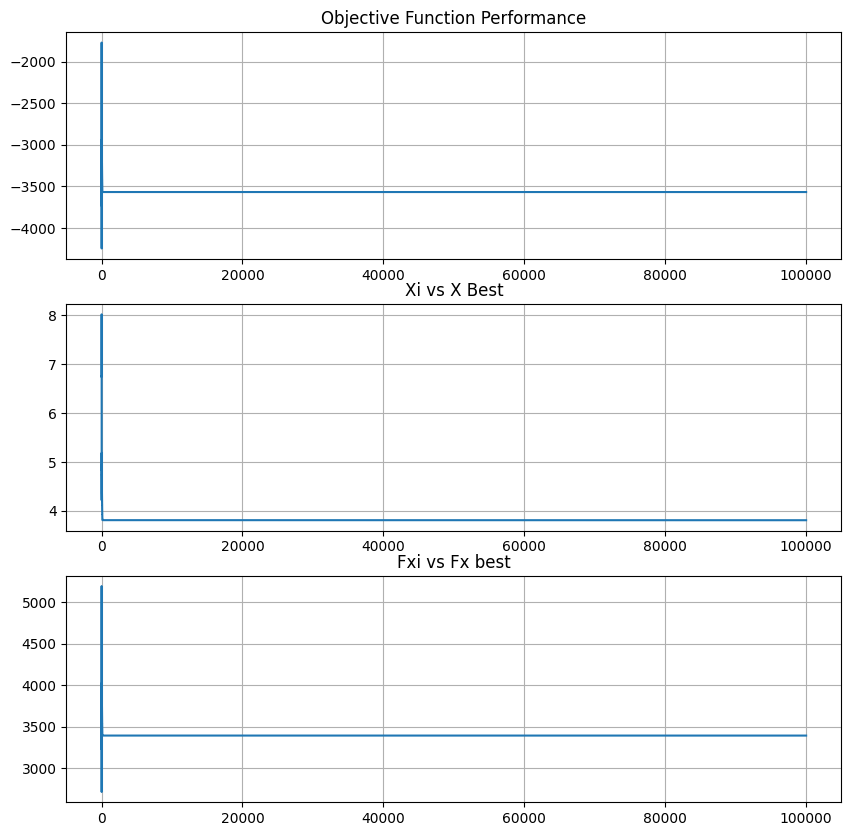

In [4]:
from _display import display_performance_results

rich_history = [{**hist, "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
  "fxi - Fx": hist["fx"] - fx_best} for hist in artificialBeeColony.history]
display_performance_results(rich_history)